In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('seattle-weather.csv')
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
weather.shape

(1461, 6)

In [4]:
weather.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
weather.isna()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


In [7]:
weather.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
weather.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [9]:
weather.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [10]:
weather.drop('date',axis=1,inplace = True)

In [11]:
weather.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [12]:
weather.skew(axis =0,skipna= True)

C:\Users\hp\AppData\Local\Temp/ipykernel_7836/2995393475.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather.skew(axis =0,skipna= True)


precipitation    3.505644
temp_max         0.280930
temp_min        -0.249459
wind             0.891668
dtype: float64

In [13]:
weather.precipitation = np.sqrt(weather.precipitation)

In [14]:
weather.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       precipitation  temp_max  temp_min  wind  weather
0          0.000000      12.8       5.0   4.7  drizzle
1          3.301515      10.6       2.8   4.5     rain
2          0.894427      11.7       7.2   2.3     rain
3          4.505552      12.2       5.6   4.7     rain
4          1.140175       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456       2.932576       4.4       1.7   2.9     rain
1457       1.224745       5.0       1.7   1.3     rain
1458       0.000000       7.2       0.6   2.6      fog
1459       0.000000       5.6      -1.0   3.4      sun
1460       0.000000       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]>

In [15]:
weather.skew()

C:\Users\hp\AppData\Local\Temp/ipykernel_7836/1076615886.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  weather.skew()


precipitation    1.607082
temp_max         0.280930
temp_min        -0.249459
wind             0.891668
dtype: float64

In [16]:
weather.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

# Analysis features

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
var = ['precipitation','temp_max','temp_min','wind']


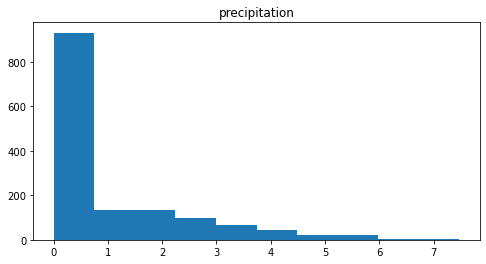

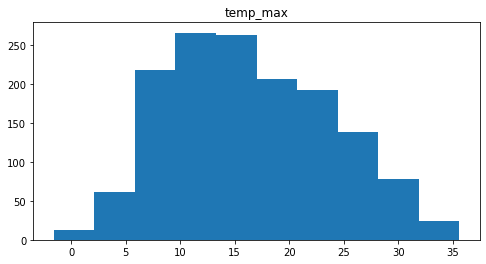

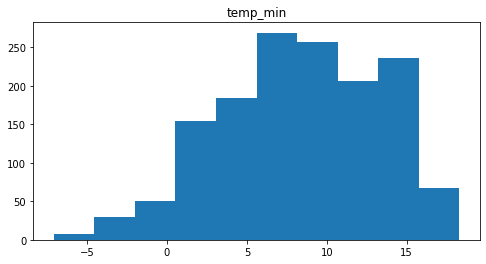

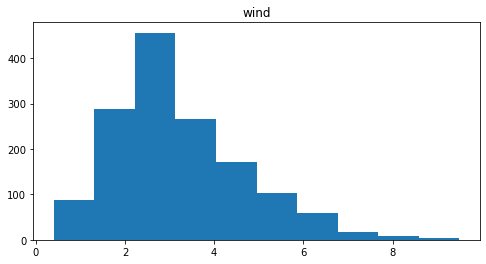

In [19]:
for col in var:
    plt.figure(figsize=(8, 4))
    plt.hist(weather[col])
    plt.title(col)
    plt.show()

# Correlation matrix

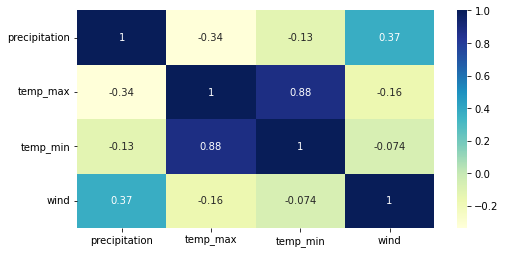

In [20]:
cor = weather.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cor,annot = True,cmap="YlGnBu")
plt.show()


In [21]:
weather.weather.unique()


array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
weather.weather = LabelEncoder().fit_transform(weather.weather)

# Dummy variables

In [24]:
wea = pd.get_dummies(weather['weather'],drop_first = True)

In [25]:
weather = pd.concat([weather,wea],axis = 1)

In [26]:
weather.weather.unique()

array([0, 2, 4, 3, 1])

In [27]:
weather.head()

,precipitation,temp_max,temp_min,wind,weather,1,2,3,4
0,0.000000,12.8,5.0,4.7,0,0,0,0,0
1,3.301515,10.6,2.8,4.5,2,0,1,0,0
2,0.894427,11.7,7.2,2.3,2,0,1,0,0
3,4.505552,12.2,5.6,4.7,2,0,1,0,0
4,1.140175,8.9,2.8,6.1,2,0,1,0,0


In [28]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   int32  
 5   1              1461 non-null   uint8  
 6   2              1461 non-null   uint8  
 7   3              1461 non-null   uint8  
 8   4              1461 non-null   uint8  
dtypes: float64(4), int32(1), uint8(4)
memory usage: 57.2 KB


# Train and test


In [29]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
X = weather[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = weather[['weather']]

In [31]:
#X_train,y_train,X_test,y_test = train_test_split(X,y,train_size=0.8,random_state = 100)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state = 100)

In [33]:
print(X_train)

      precipitation  temp_max  temp_min  wind
290        0.000000      14.4       6.1   1.6
24         2.846050       8.9       4.4   5.4
1093       0.000000       6.1       0.6   4.3
1288       0.000000      26.1      16.7   2.2
374        6.196773      10.0       1.7   5.1
...             ...       ...       ...   ...
802        0.707107      13.9       5.0   2.5
53         0.000000       8.3       2.8   3.9
350        4.753946       6.7       3.3   5.5
79         1.897367       7.8       2.2   6.4
792        3.271085      14.4       8.9   5.1

[1168 rows x 4 columns]


In [34]:
print(y_train)

      weather
290         4
24          2
1093        1
1288        4
374         2
...       ...
802         2
53          4
350         3
79          2
792         2

[1168 rows x 1 columns]


### Training a Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
weath = LinearRegression()

In [39]:
weather_score = weath.fit(X_train ,y_train)

In [41]:
r2_score = weather_score.score(X_test,y_test)
print(r2_score*100,'%')

26.841318639373767 %
